# cancer TRAIN

In [4]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## preprocess the data

In [6]:



# //Data Preprocessing
# Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
 r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=4,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = training_set.class_names
print(class_name)

Found 4745 files belonging to 2 classes.
['benign', 'malignant']



### Validation Image Preprocessing

In [7]:

validation_set = tf.keras.utils.image_dataset_from_directory(
  r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=4,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 1581 files belonging to 2 classes.
['benign', 'malignant']


# Building Model

In [8]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='sigmoid'))

## Compiling and Training Phase

In [18]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1187/1187 [==============================] - 23s 14ms/step - loss: 0.5513 - accuracy: 0.7583 - val_loss: 0.5055 - val_accuracy: 0.8027
Epoch 2/10
1187/1187 [==============================] - 16s 14ms/step - loss: 0.4748 - accuracy: 0.8063 - val_loss: 0.4729 - val_accuracy: 0.8109
Epoch 3/10
1187/1187 [==============================] - 16s 14ms/step - loss: 0.4420 - accuracy: 0.8333 - val_loss: 0.4960 - val_accuracy: 0.8242
Epoch 4/10
1187/1187 [==============================] - 16s 14ms/step - loss: 0.3989 - accuracy: 0.8548 - val_loss: 0.3815 - val_accuracy: 0.8564
Epoch 5/10
1187/1187 [==============================] - 16s 14ms/step - loss: 0.3885 - accuracy: 0.8626 - val_loss: 0.3614 - val_accuracy: 0.8703
Epoch 6/10
1187/1187 [==============================] - 16s 14ms/step - loss: 0.3794 - accuracy: 0.8660 - val_loss: 0.3514 - val_accuracy: 0.8722
Epoch 7/10
1187/1187 [==============================] - 16s 14ms/step - loss: 0.3492 - accuracy: 0.8717 - val_loss: 0.4022 -

# Evaluating Model

In [21]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1187/1187 [==============================] - 6s 5ms/step - loss: 0.2486 - accuracy: 0.9041
Training accuracy: 0.9041095972061157


In [22]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

396/396 [==============================] - 2s 5ms/step - loss: 0.3230 - accuracy: 0.8748
Validation accuracy: 0.8747628331184387


In [23]:
cnn.save('trnew_cancer_modelv1.0.keras')

In [24]:
training_history.history

{'loss': [0.5512648820877075,
  0.4747887849807739,
  0.4420156478881836,
  0.39887040853500366,
  0.388454407453537,
  0.3794495761394501,
  0.3492189943790436,
  0.33529233932495117,
  0.3130831718444824,
  0.29554569721221924],
 'accuracy': [0.7582718729972839,
  0.806322455406189,
  0.8332982063293457,
  0.8547945022583008,
  0.8625922203063965,
  0.8659641742706299,
  0.8716543912887573,
  0.8716543912887573,
  0.8842992782592773,
  0.8838777542114258],
 'val_loss': [0.5055041909217834,
  0.47289153933525085,
  0.49602824449539185,
  0.3814983665943146,
  0.3614308536052704,
  0.35138577222824097,
  0.4021930992603302,
  0.344621866941452,
  0.3404453694820404,
  0.3230063319206238],
 'val_accuracy': [0.8026565313339233,
  0.8108791708946228,
  0.824161946773529,
  0.8564199805259705,
  0.8703352212905884,
  0.8722327351570129,
  0.8665401935577393,
  0.8760278224945068,
  0.8697026968002319,
  0.8747628331184387]}

In [25]:
import json
with open('training_hist_cancer.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## ACCUracy visual

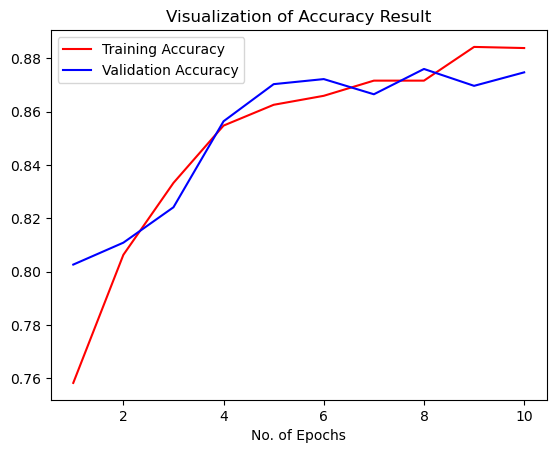

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [28]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
   r"D:\01 STUDY MATERIAL\ai project\Breast-Splitted\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1583 files belonging to 2 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1583/1583 [==============================] - 5s 3ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(1583,), dtype=int64, numpy=array([0, 0, 0, ..., 1, 1, 1], dtype=int64)>

In [33]:
predicted_categories

<tf.Tensor: shape=(1583,), dtype=int64, numpy=array([0, 0, 1, ..., 1, 0, 0], dtype=int64)>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

SyntaxError: iterable argument unpacking follows keyword argument unpacking (4134644860.py, line 1)

In [31]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      benign       0.78      0.79      0.78       496
   malignant       0.90      0.90      0.90      1087

    accuracy                           0.86      1583
   macro avg       0.84      0.84      0.84      1583
weighted avg       0.86      0.86      0.86      1583



## Confusion Matrix Visualization

In [1]:
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

NameError: name 'plt' is not defined